In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv(".\CareerMapping1.csv")

In [3]:
data.drop(columns=["Unnamed: 0"],inplace=True)

In [4]:
data.columns

Index(['Computer Architecture', 'Programming Skills', 'Project Management',
       'Communication skills', 'Openness', 'Conscientousness', 'Extraversion',
       'Agreeableness', 'Emotional_Range', 'Conversation',
       'Openness to Change', 'Hedonism', 'Self-enhancement',
       'Self-transcendence', 'Role'],
      dtype='object')

In [5]:
y = data.pop("Role")

In [6]:
y

0        Database Administrator
1        Database Administrator
2        Database Administrator
3        Database Administrator
4        Database Administrator
                  ...          
10174           Project Manager
10175         Graphics Designer
10176        Software Developer
10177         Hardware Engineer
10178         Helpdesk Engineer
Name: Role, Length: 10179, dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y)


In [8]:
original_labels = label_encoder.classes_
label_mapping = {i: label for i, label in enumerate(original_labels)}
print(label_mapping)

{0: 'AI ML Specialist', 1: 'API Specialist', 2: 'Application Support Engineer', 3: 'Business Analyst', 4: 'Customer Service Executive', 5: 'Cyber Security Specialist', 6: 'Database Administrator', 7: 'Graphics Designer', 8: 'Hardware Engineer', 9: 'Helpdesk Engineer', 10: 'Information Security Specialist', 11: 'Networking Engineer', 12: 'Project Manager', 13: 'Software Developer', 14: 'Software tester', 15: 'Technical Writer'}


In [9]:
y_train_encoded

array([ 6,  6,  6, ..., 13,  8,  9])

In [10]:
x_train,x_temp,y_train,y_temp=train_test_split(data,y_train_encoded,test_size=0.5)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.6)

In [11]:
for i in range(10,100,5):
    tree_classifier = DecisionTreeClassifier(max_depth=i)
    tree_classifier.fit(x_train, y_train)
    y_train_pred = tree_classifier.predict(x_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    y_val_pred = tree_classifier.predict(x_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f" Train accuracy and Val accuracy for nearest neighbour {i} is {train_accuracy} and {val_accuracy}")

 Train accuracy and Val accuracy for nearest neighbour 10 is 0.6773432894478286 and 0.6665029469548134
 Train accuracy and Val accuracy for nearest neighbour 15 is 0.9270976616231087 and 0.8958742632612967
 Train accuracy and Val accuracy for nearest neighbour 20 is 0.9717036745922578 and 0.9052062868369352
 Train accuracy and Val accuracy for nearest neighbour 25 is 0.9889958734525447 and 0.9052062868369352
 Train accuracy and Val accuracy for nearest neighbour 30 is 0.9990174887011201 and 0.9042239685658153
 Train accuracy and Val accuracy for nearest neighbour 35 is 1.0 and 0.906188605108055
 Train accuracy and Val accuracy for nearest neighbour 40 is 1.0 and 0.906188605108055
 Train accuracy and Val accuracy for nearest neighbour 45 is 1.0 and 0.9037328094302554
 Train accuracy and Val accuracy for nearest neighbour 50 is 1.0 and 0.9037328094302554
 Train accuracy and Val accuracy for nearest neighbour 55 is 1.0 and 0.9032416502946955
 Train accuracy and Val accuracy for nearest ne

In [12]:
tree_classifier = DecisionTreeClassifier(max_depth=15)
tree_classifier.fit(x_train, y_train)
y_train_pred = tree_classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = tree_classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(train_accuracy)
print(test_accuracy)

0.9270976616231087
0.8870333988212181


[[97.06390328  0.17271157  0.17271157  0.          0.17271157  0.
   0.          1.38169257  0.69084629  0.          0.          0.
   0.          0.          0.          0.34542314]
 [ 0.33222591 94.35215947  0.33222591  0.          0.          0.
   0.          1.66112957  2.65780731  0.          0.          0.
   0.          0.          0.          0.66445183]
 [ 0.          0.         84.96732026  0.32679739  0.65359477  0.
   0.          4.90196078  1.63398693  7.51633987  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          4.96688742 90.06622517  0.66225166  0.
   0.          0.99337748  2.31788079  0.          0.          0.
   0.          0.33112583  0.          0.66225166]
 [ 0.66225166  0.          0.          0.33112583 95.36423841  0.
   0.          1.98675497  0.66225166  0.          0.          0.
   0.33112583  0.          0.          0.66225166]
 [ 0.          0.35087719  0.          0.          1.05263158 92.98245614
   0.      

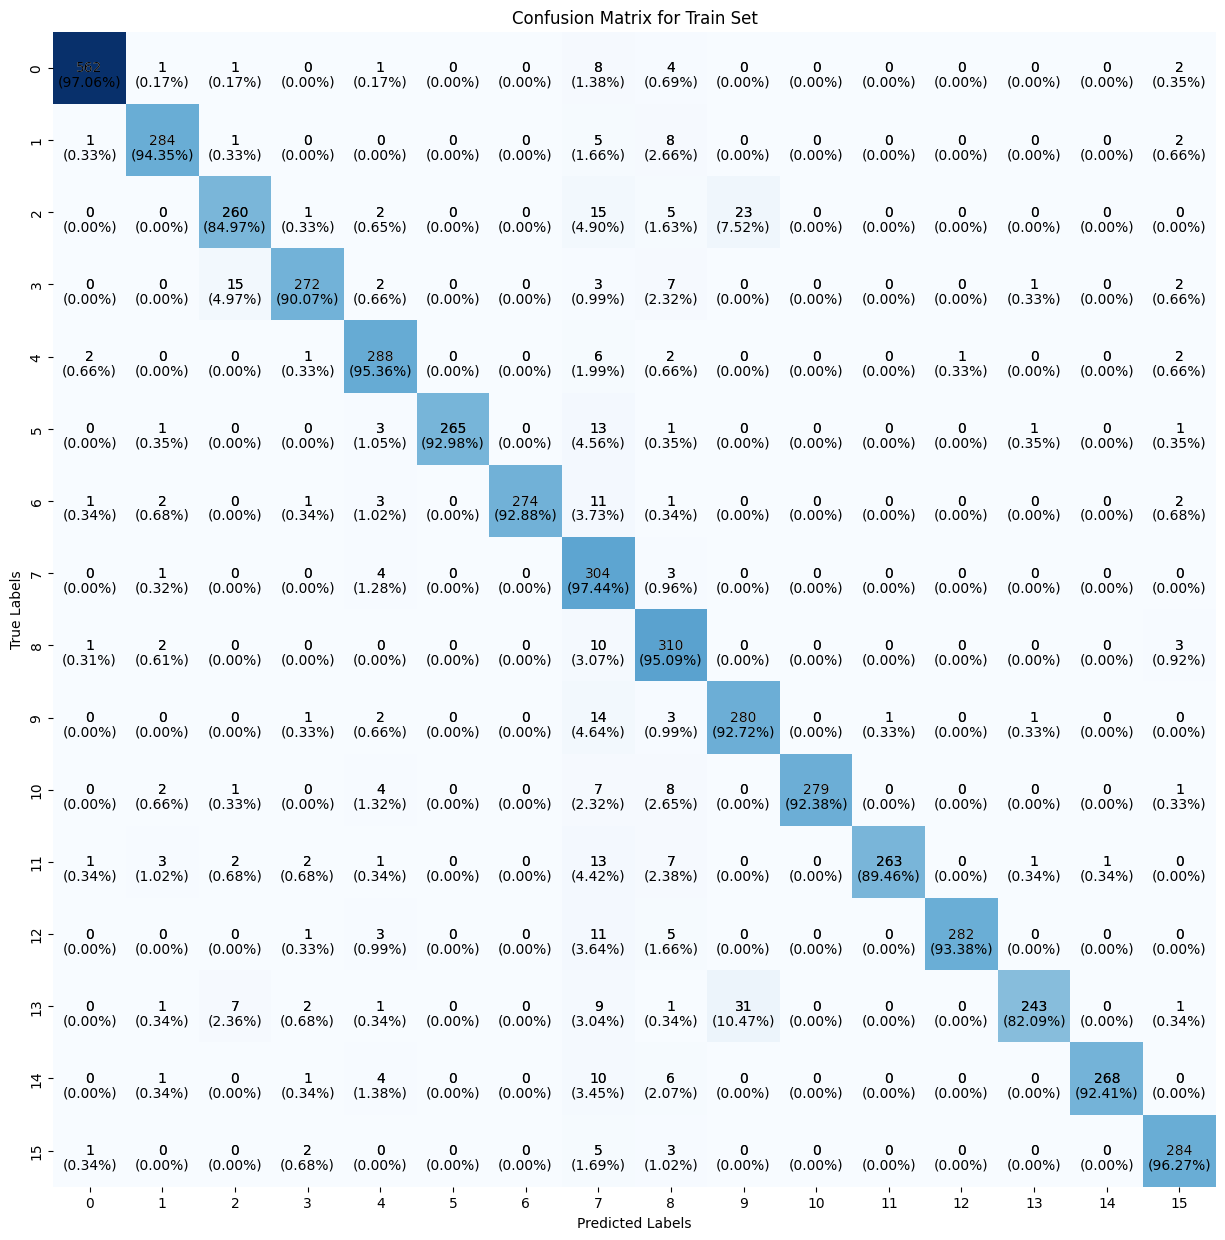

In [13]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Train Set')
plt.show()

[[94.80122324  0.6116208   0.          0.6116208   0.          0.
   0.          1.83486239  0.6116208   0.          0.          0.3058104
   0.          0.          0.3058104   0.91743119]
 [ 0.         85.          0.55555556  0.55555556  0.55555556  0.
   0.55555556  2.77777778  5.55555556  0.          0.55555556  0.
   0.          0.          0.55555556  3.33333333]
 [ 0.          0.55865922 87.15083799  0.55865922  0.55865922  0.
   0.          2.79329609  1.67597765  5.58659218  0.          0.
   0.          0.55865922  0.          0.55865922]
 [ 0.50505051  2.02020202  9.5959596  77.27272727  0.50505051  0.
   0.          4.54545455  1.51515152  0.          0.          1.01010101
   0.          0.50505051  1.01010101  1.51515152]
 [ 0.          0.58479532  0.58479532  0.         92.39766082  0.
   0.          4.09356725  1.75438596  0.          0.          0.
   0.          0.          0.          0.58479532]
 [ 0.          0.54644809  0.          0.54644809  0.54644809 91.25683

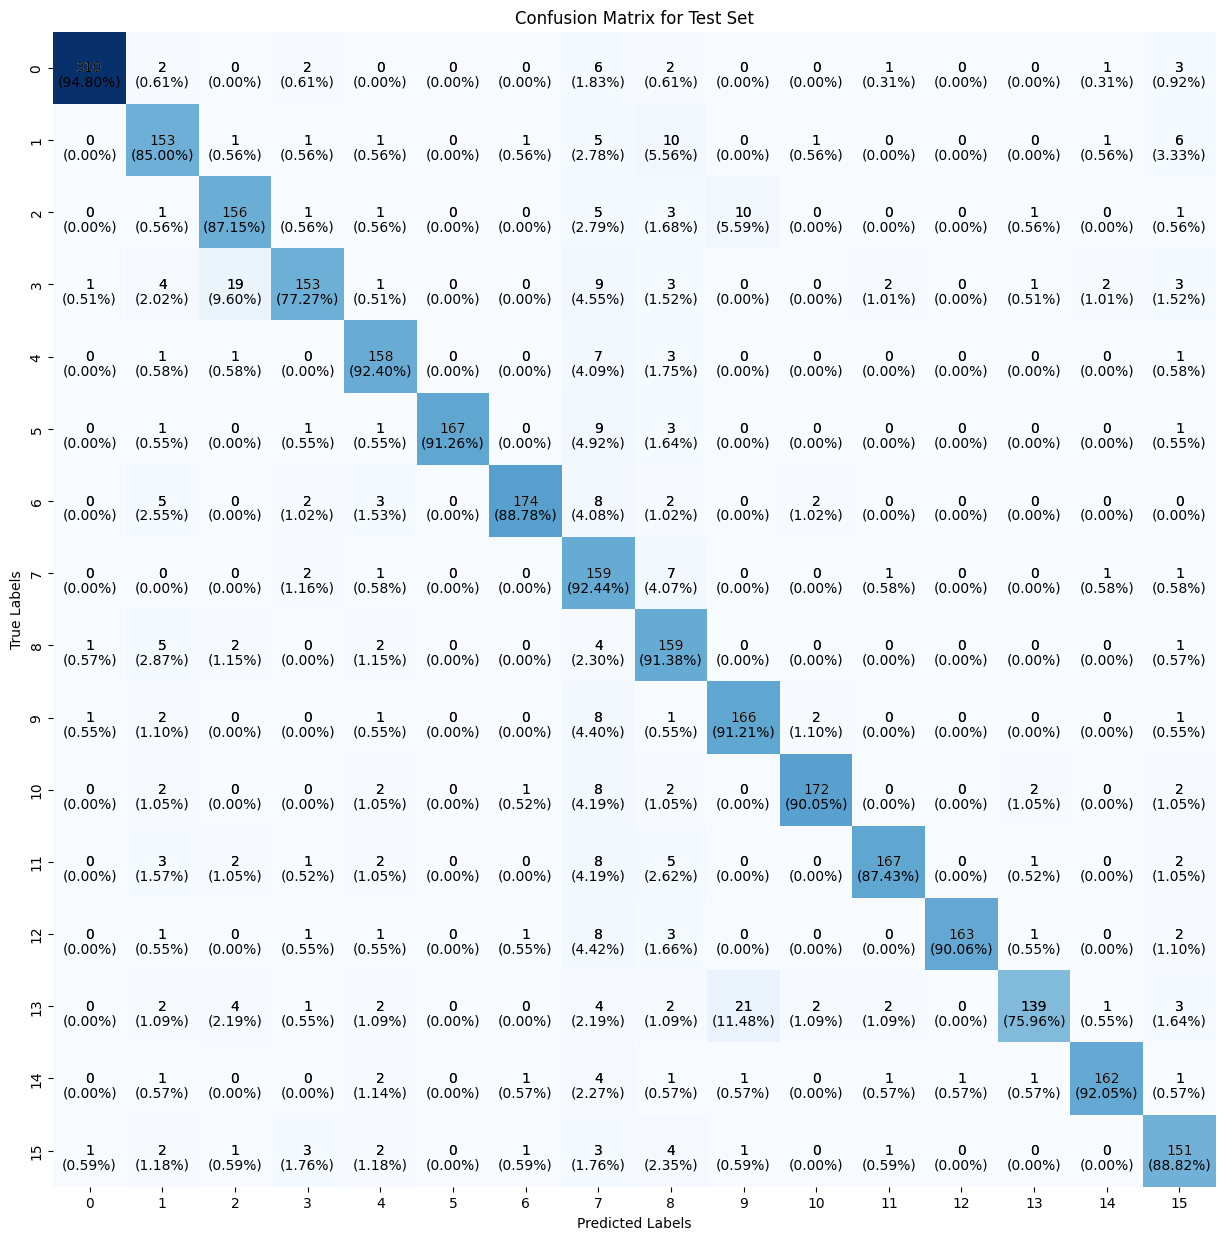

In [14]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
row_sums = conf_matrix.sum(axis=1, keepdims=True)
conf_matrix_percent = conf_matrix / row_sums * 100
print(conf_matrix_percent)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)
        plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
                 horizontalalignment="center",
                 verticalalignment="center", color="black", fontsize=10)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [ ]:
# rf = RandomForestClassifier()
# rf.fit(x_train,y_train)
# y_train_pred = rf.predict(x_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# y_test_pred = rf.predict(x_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(train_accuracy)
# print(test_accuracy)

In [ ]:
# conf_matrix = confusion_matrix(y_test, y_test_pred)
# row_sums = conf_matrix.sum(axis=1, keepdims=True)
# conf_matrix_percent = conf_matrix / row_sums * 100
# print(conf_matrix_percent)

# plt.figure(figsize=(15, 15))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)


# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         plt.text(j + 0.5, i + 0.5, f"{conf_matrix[i, j]}",
#                  horizontalalignment="center",
#                  verticalalignment="center", color="black", fontsize=10)
#         plt.text(j + 0.5, i + 0.7, f"({conf_matrix_percent[i, j]:.2f}%)",
#                  horizontalalignment="center",
#                  verticalalignment="center", color="black", fontsize=10)

# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix for Test Set')
# plt.show()

#Parameter Tuning

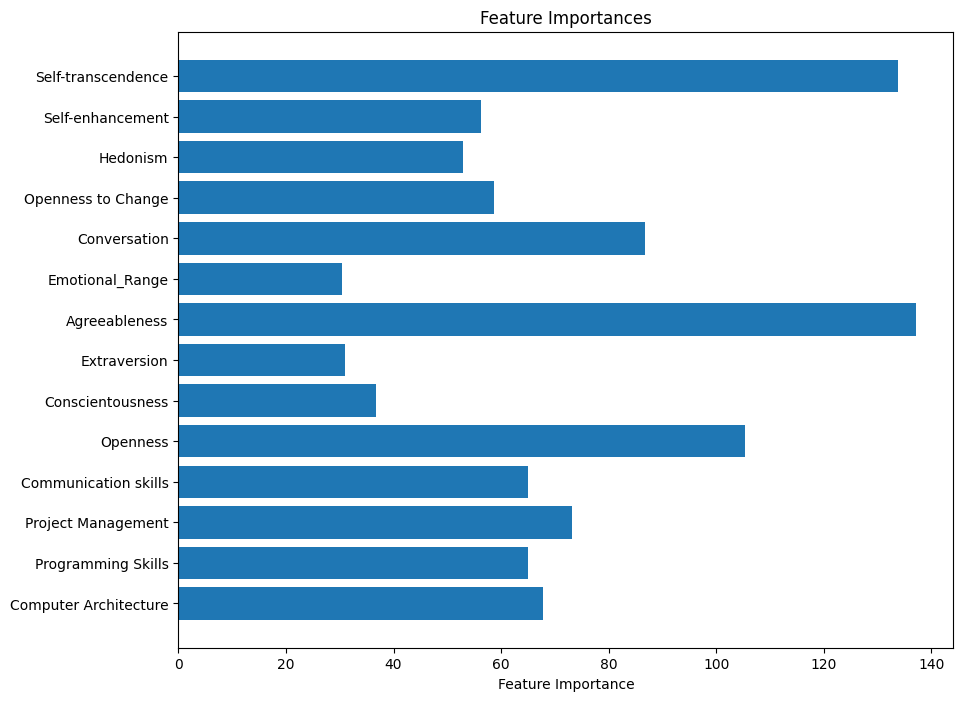

In [15]:
a=tree_classifier.feature_importances_

fi_data = a * 1000
labels = ['Computer Architecture', 'Programming Skills', 'Project Management',
       'Communication skills', 'Openness', 'Conscientousness', 'Extraversion',
       'Agreeableness', 'Emotional_Range', 'Conversation',
       'Openness to Change', 'Hedonism', 'Self-enhancement',
       'Self-transcendence']

indices = range(len(fi_data))

plt.figure(figsize=(10, 8))
plt.barh(indices, fi_data, align='center')
plt.yticks(indices, labels)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()
